In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

In [2]:
#Load selected dataset
data = load_iris()
X = data.data
y = data.target

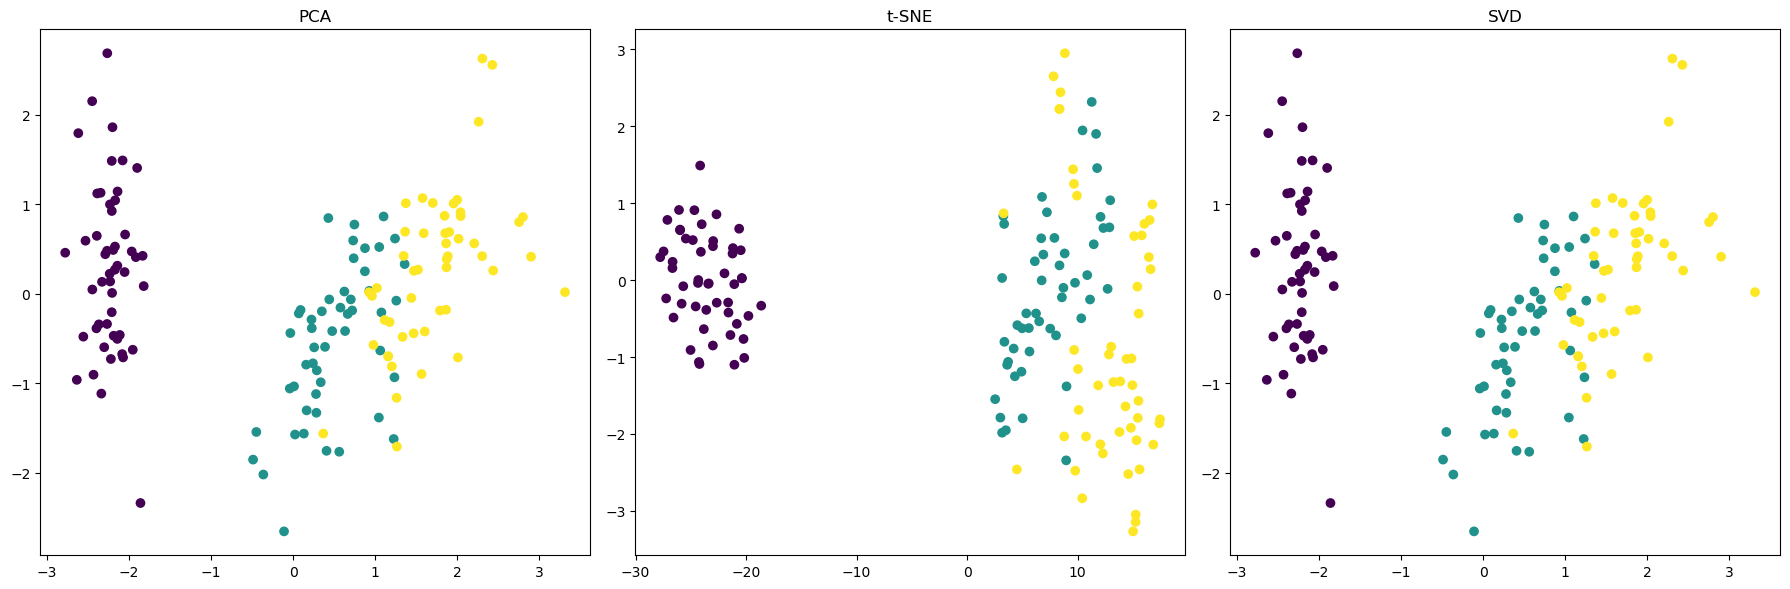

Explained Variance Ratio for PCA: [0.72962445 0.22850762]
Cumulative Explained Variance (for 2 components): 0.96
PCA captures a large portion of the variance with just the chosen components (2D).

Advantages of PCA based on explained variance:
PCA is effective in reducing dimensionality while retaining most of the information in the data.

Disadvantages of PCA based on explained variance:
PCA effectively preserves the variance, but it may still have limitations with non-linear relationships or outliers.

Computation Time Comparison:
PCA computation time: 0.0010 seconds
t-SNE computation time: 0.4396 seconds
SVD computation time: 0.0010 seconds

Visual Comparison:
Observe the scatter plots to evaluate how well each method separates the data:
- PCA: Linear dimensionality reduction, captures the largest variance in the data.
- t-SNE: Non-linear method, good for preserving local structure and clusters but computationally expensive.
- SVD: Similar to PCA but can be used in contexts like spa

In [3]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time
import numpy as np

# Load the dataset
data = load_iris()
X = data.data
y = data.target

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
start_time = time.time()
X_pca = pca.fit_transform(X_scaled)
pca_time = time.time() - start_time

# Step 5: Apply other dimensionality reduction methods for comparison

# TSNE for comparison
tsne = TSNE(n_components=2)
start_time = time.time()
X_tsne = tsne.fit_transform(X_scaled)
tsne_time = time.time() - start_time

# TruncatedSVD for comparison (alternative to PCA)
svd = TruncatedSVD(n_components=2)
start_time = time.time()
X_svd = svd.fit_transform(X_scaled)
svd_time = time.time() - start_time

# Step 6: Visualize the results
plt.figure(figsize=(18, 6))

# Plotting PCA
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA')

# Plotting t-SNE
plt.subplot(1, 3, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE')

# Plotting SVD
plt.subplot(1, 3, 3)
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='viridis')
plt.title('SVD')

plt.tight_layout()
plt.show()

# Step 7: Show explained variance ratio for PCA
print("Explained Variance Ratio for PCA:", pca.explained_variance_ratio_)

# Step 8: Discuss the advantages and disadvantages based on the explained variance ratio

# Calculate the cumulative explained variance to assess how much total variance is captured
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Print out the cumulative explained variance for a clearer view
print(f"Cumulative Explained Variance (for 2 components): {cumulative_variance[-1]:.2f}")

# Discussion of Advantages and Disadvantages based on the results
if cumulative_variance[-1] < 0.90:
    print("PCA does not capture enough variance with the chosen components (2D). It may require more components.")
else:
    print("PCA captures a large portion of the variance with just the chosen components (2D).")

# Advantages based on explained variance ratio:
print("\nAdvantages of PCA based on explained variance:")
if cumulative_variance[-1] > 0.80:
    print("PCA is effective in reducing dimensionality while retaining most of the information in the data.")
else:
    print("PCA may lose too much information when reducing the dimensions to 2 components.")

# Disadvantages based on explained variance ratio:
print("\nDisadvantages of PCA based on explained variance:")
if cumulative_variance[-1] < 0.90:
    print("PCA may not be ideal when a large amount of data variance is lost in the dimensionality reduction process.")
else:
    print("PCA effectively preserves the variance, but it may still have limitations with non-linear relationships or outliers.")

# **Comparison of computational time for each technique**
print("\nComputation Time Comparison:")
print(f"PCA computation time: {pca_time:.4f} seconds")
print(f"t-SNE computation time: {tsne_time:.4f} seconds")
print(f"SVD computation time: {svd_time:.4f} seconds")

# **Visual Comparison:**
print("\nVisual Comparison:")
print("Observe the scatter plots to evaluate how well each method separates the data:")
print("- PCA: Linear dimensionality reduction, captures the largest variance in the data.")
print("- t-SNE: Non-linear method, good for preserving local structure and clusters but computationally expensive.")
print("- SVD: Similar to PCA but can be used in contexts like sparse matrices.")



### PCA (Principal Component Analysis)

#### Advantages:
- **Simplicity**: PCA is relatively easy to implement and understand. It provides an intuitive method for reducing the dimensionality of data.
- **Interpretability**: Since PCA is linear, it is often easier to interpret. It identifies principal components, which can be mapped back to the original features.
- **Speed**: PCA is computationally efficient and works well on datasets with fewer dimensions.
- **Global Structure Preservation**: PCA preserves global variance (i.e., the global structure of the data), making it good for many types of data.

#### Disadvantages:
- **Linear Assumption**: PCA assumes that data lies along linear axes, which limits its ability to capture complex, non-linear relationships between features.
- **Sensitivity to Outliers**: PCA is sensitive to outliers because they can have a large influence on the computed principal components.
- **Interpretability of Components**: While PCA is interpretable in terms of variance explained, the principal components themselves may not always map to real-world features in a meaningful way.
- **No Clustering Insights**: PCA does not explicitly aim to group similar data points together, which can make clustering tasks harder if data is not naturally linear.

### t-SNE (t-Distributed Stochastic Neighbor Embedding)

#### Advantages:
- **Non-linear Relationships**: t-SNE can capture complex non-linear relationships in data, which is something PCA may struggle with.
- **Visualizing Clusters**: t-SNE is excellent for visualizing clusters or groups within the data, especially when working with high-dimensional data.
- **Effective for High-Dimensional Data**: t-SNE is especially effective in visualizing the structure of high-dimensional data when reduced to 2 or 3 dimensions.

#### Disadvantages:
- **Computationally Expensive**: t-SNE is much slower and more resource-intensive compared to PCA, especially for large datasets.
- **Non-Global Structure Preservation**: While t-SNE works well for local structure (nearness), it does not preserve the global structure of the data, meaning distances between clusters or groups may not be accurately represented.
- **Parameter Sensitivity**: t-SNE requires careful tuning of its parameters (like perplexity), which can significantly affect the resulting visualization.
- **No Explicit Component Scores**: Unlike PCA, t-SNE does not provide a clear mathematical representation of how features contribute to the reduced dimensions.

### SVD (Singular Value Decomposition)

#### Advantages:
- **Sparse Data Handling**: SVD works well with sparse matrices and large datasets, making it ideal for text data (such as TF-IDF matrices in NLP).
- **Generalizable**: SVD is applicable to any matrix decomposition and can be used in a wide variety of fields, including image processing and collaborative filtering.
- **Data Compression**: SVD allows for efficient storage and compression of data, retaining the most important singular values and vectors while discarding the less significant ones.

#### Disadvantages:
- **Less Intuitive**: Unlike PCA, SVD does not directly provide a clear interpretation of the components in terms of the original features, which can make it harder to interpret.
- **Computationally Heavy**: While SVD is a powerful technique, it can be computationally intensive, especially for large datasets.
- **May Not Preserve Global Structure**: SVD, like PCA, is linear and may not capture more complex, non-linear patterns in the data.

### Summary:

- PCA is great for quick, interpretable dimensionality reduction when you want to preserve the global variance of the data, especially when the data is linear.
- t-SNE is powerful for visualizing non-linear relationships and clustering, but it is slower and more computationally expensive.
- SVD is ideal for large, sparse datasets and compression tasks but lacks interpretability and may not preserve the global structure as effectively as PCA.